<h1>Model training</h1>
<h3>First we read the data</h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("./database/database_C1'.csv", sep=',', index_col=0)

In [4]:
#since it is written as strings we need to change the format 
for column in data.columns:
    data[column] = data[column].apply(lambda x: np.array(list(map(float, x.split(',')))))
data['class'] = 1
data

,N1,N2,N3,N4,N5,N6,class
0,"[72.379, 32.575, 10.796]","[77.895, 33.755, 9.769]","[84.753, 31.765, 9.188]","[84.547, 36.507, 11.124]","[82.675, 41.303, 11.068]","[78.004, 41.475, 11.663]",1
1,"[14.263, 65.819, 16.505]","[12.633, 71.007, 16.327]","[8.943, 76.9, 18.215]","[7.04, 76.843, 13.362]","[8.532, 76.432, 8.41]","[11.439, 72.111, 8.645]",1
2,"[54.509, 39.342, 49.313]","[60.011, 39.781, 49.868]","[66.82, 38.868, 48.066]","[67.582, 37.195, 52.963]","[65.914, 38.341, 58.251]","[61.112, 38.748, 57.643]",1
3,"[2.716, 78.732, 56.751]","[1.84, 82.233, 60.059]","[-1.302, 89.045, 61.814]","[2.221, 90.716, 58.883]","[8.213, 91.183, 58.757]","[9.909, 85.912, 58.753]",1
4,"[13.564, 1.567, 34.626]","[17.065, 3.703, 38.174]","[20.272, 6.608, 44.34]","[24.028, 9.055, 40.759]","[27.216, 8.24, 36.398]","[23.132, 5.894, 33.628]",1
...,...,...,...,...,...,...,...
244,"[90.13, -27.415, -13.33]","[88.613, -27.251, -18.576]","[86.9, -22.725, -24.629]","[83.582, -26.819, -24.172]","[81.266, -31.551, -23.335]","[82.567, -32.633, -18.651]",1
245,"[99.603, -27.307, -86.447]","[98.735, -25.749, -91.736]","[101.652, -24.045, -98.223]","[98.279, -20.815, -96.961]","[94.253, -17.913, -95.312]","[93.081, -20.084, -90.57]",1
246,"[12.82, -40.452, 49.71]","[13.097, -36.791, 45.491]","[9.362, -32.846, 40.475]","[13.796, -34.92, 38.285]","[18.834, -36.739, 37.041]","[19.426, -39.836, 41.043]",1
247,"[85.871, -113.233, -36.136]","[88.489, -108.437, -35.794]","[94.064, -104.485, -32.355]","[90.002, -101.396, -32.8]","[85.863, -98.73, -35.114]","[82.935, -103.078, -36.044]",1


In [5]:
#stems
d1 = pd.read_csv("./stems_database_C1'.csv", sep=',', index_col=0)
for column in d1.columns[:-1]:
    d1[column] = d1[column].apply(lambda x: np.array(list(map(float, x.split(',')))))
d1 = d1.reset_index(drop=True)

#hairpins
d2 = pd.read_csv("./hairpins_database_C1'.csv", sep=',', index_col=0)
for column in d2.columns[:-1]:
    d2[column] = d2[column].apply(lambda x: np.array(list(map(float, x.split(',')))))
d2 = d2.reset_index(drop=True)
d2

#internal loops
d3 = pd.read_csv("./loops_database_C1'.csv", sep=',', index_col=0)
for column in d3.columns[:-1]:
    d3[column] = d3[column].apply(lambda x: np.array(list(map(float, x.split(',')))))
d3 = d3.reset_index(drop=True)
d3

#ends
d4 = pd.read_csv("./ends_database_C1'.csv", sep=',', index_col=0)
for column in d4.columns[:-1]:
    d4[column] = d4[column].apply(lambda x: np.array(list(map(float, x.split(',')))))
d4 = d4.reset_index(drop=True)
d4

#mix
d5 = pd.read_csv("./mix_database_C1'.csv", sep=',', index_col=0)
for column in d5.columns[:-1]:
    d5[column] = d5[column].apply(lambda x: np.array(list(map(float, x.split(',')))))
d5 = d5.reset_index(drop=True)
d5

#mix_with_seqs_assigned
d5v2 = pd.read_csv("./mix_database_C1_v2'.csv", sep=',', index_col=0)
for column in d5v2.columns[:-1]:
    d5v2[column] = d5v2[column].apply(lambda x: np.array(list(map(float, x.split(',')))))
d5v2 = d5v2.reset_index(drop=True)
d5v2

data_full = pd.concat([data, d1, d2, d3, d4, d5v2[:70]])
data_full

,N1,N2,N3,N4,N5,N6,class
0,"[72.379, 32.575, 10.796]","[77.895, 33.755, 9.769]","[84.753, 31.765, 9.188]","[84.547, 36.507, 11.124]","[82.675, 41.303, 11.068]","[78.004, 41.475, 11.663]",1
1,"[14.263, 65.819, 16.505]","[12.633, 71.007, 16.327]","[8.943, 76.9, 18.215]","[7.04, 76.843, 13.362]","[8.532, 76.432, 8.41]","[11.439, 72.111, 8.645]",1
2,"[54.509, 39.342, 49.313]","[60.011, 39.781, 49.868]","[66.82, 38.868, 48.066]","[67.582, 37.195, 52.963]","[65.914, 38.341, 58.251]","[61.112, 38.748, 57.643]",1
3,"[2.716, 78.732, 56.751]","[1.84, 82.233, 60.059]","[-1.302, 89.045, 61.814]","[2.221, 90.716, 58.883]","[8.213, 91.183, 58.757]","[9.909, 85.912, 58.753]",1
4,"[13.564, 1.567, 34.626]","[17.065, 3.703, 38.174]","[20.272, 6.608, 44.34]","[24.028, 9.055, 40.759]","[27.216, 8.24, 36.398]","[23.132, 5.894, 33.628]",1
...,...,...,...,...,...,...,...
65,"[18.513, 18.092, 15.376]","[13.348, 19.338, 15.43]","[9.175, 22.979, 14.812]","[7.433, 27.676, 12.524]","[7.529, 32.23, 8.936]","[8.915, 33.856, 4.093]",0
66,"[220.971, 180.798, 225.049]","[222.339, 177.97, 229.865]","[221.535, 172.476, 232.138]","[220.896, 167.117, 231.508]","[220.044, 161.736, 228.866]","[221.215, 158.853, 224.245]",0
67,"[6.588, 9.234, -5.055]","[0.474, 3.535, -4.993]","[-4.577, 0.504, -1.091]","[-4.18, -4.662, -0.978]","[-1.922, -9.904, -0.68]","[2.59, -12.701, -2.25]",0
68,"[125.125, 210.237, 138.94]","[121.62, 213.878, 137.074]","[120.773, 217.881, 133.656]","[122.193, 219.31, 128.765]","[123.666, 217.864, 123.514]","[122.827, 213.852, 117.456]",0


In [6]:
# Reading sequences data from CSV file
import csv
seqs = []

with open("./database/database_C1'_seqs.csv", 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        seqs.append(row[0])

with open("./stems_database_C1'_seqs.csv", 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        seqs.append(row[0])

with open("./hairpins_database_C1'_seqs.csv", 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        seqs.append(row[0])

with open("./loops_database_C1'_seqs.csv", 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        seqs.append(row[0])

with open("./ends_database_C1'_seqs.csv", 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        seqs.append(row[0])

with open("./mix_database_C1'_seqs.csv", 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        if len(seqs) == data_full.shape[0]:
            break
        seqs.append(row[0])

<h5>Now we can compute various features
  <ul>
    <li>planar angles</li>
    <li>torsian angles</li>
    <li>atom distances</li>
  </ul>
</h5>

In [7]:
def count_planar_angle(p1, p2, p3):
    b1 = p2 - p1
    b2 = p2 - p3

    angle = np.arccos(np.dot(b1, b2) / (np.linalg.norm(b1) * np.linalg.norm(b2)))
    return np.degrees(angle)

def count_torsion_angle(p1, p2, p3, p4):
    b1 = p2 - p1
    b2 = p3 - p2
    b3 = p4 - p3

    n1 = np.cross(b1, b2)
    n2 = np.cross(b2, b3)

    torsion = np.arctan2(
        np.dot(np.cross(n1, n2), b2 * np.linalg.norm(b2)), np.dot(n1, n2)
    )
    return np.degrees(torsion)

def count_euclid_dist(a,b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2 + (a[2] - b[2])**2)

In [6]:
######## OLD VERSION ########
planar_angles_full = []
for row in data_full.iloc[:,:-1].iterrows():
    tmp = []
    for j in range(0,len(row[1])-2):
        tmp.append(count_planar_angle(row[1][j], row[1][j+1], row[1][j+2]))
    planar_angles_full.append(tmp)

planar_angles_full = pd.DataFrame(planar_angles_full)
print(planar_angles_full)

              0           1           2           3
0    151.433853   70.971404  150.715285  113.145123
1    157.633789   86.219687  141.668490  100.544318
2    156.249586   86.746387  140.059179  101.028166
3    149.227210   82.615309  139.384181  103.377556
4    164.217632   86.117504  144.747243   91.866316
..          ...         ...         ...         ...
489  148.333184  158.598441   73.841643  148.351009
490  102.032862   51.771520   80.427548  142.462600
491  112.610208   89.261354  155.712118  133.648910
492  144.329616  121.690469  126.638409   35.733621
493  138.085675  118.335701   90.116241   37.103363

[494 rows x 4 columns]


In [8]:
planar_angles_full = []
cols =[]
for row in data_full.iloc[:,:-1].iterrows():
    tmp = []
    for i in range(len(row[1]) - 2):
        for j in range(i + 1, len(row[1]) - 1):
            for k in range(j + 1, len(row[1])):
                tmp.append(count_planar_angle(row[1][i], row[1][j], row[1][k]))
                if len(cols) < 20:
                    cols.append((i,j,k))
    planar_angles_full.append(tmp)

planar_angles_full = pd.DataFrame(planar_angles_full)
planar_angles_full.columns=cols
print(planar_angles_full)

      (0, 1, 2)   (0, 1, 3)   (0, 1, 4)   (0, 1, 5)   (0, 2, 3)   (0, 2, 4)  \
0    151.433853  156.610852  130.969524   99.809688   81.473986   72.943025   
1    157.633789  148.449353  129.654734  102.217303   91.057233   80.670525   
2    156.249586  152.574492  129.456448  103.048040   93.600313   79.270366   
3    149.227210  127.373339  113.322206   91.947715   78.573351   75.254982   
4    164.217632  154.964573  129.608687  103.226354   92.135806   80.616554   
..          ...         ...         ...         ...         ...         ...   
489  151.645686  136.235939  123.602870  113.644186  134.181511  123.109922   
490  137.374252  125.129246  113.696974  102.817955  131.963211  121.805463   
491  145.032583  151.724213  139.881447  125.086218  122.620527  113.408675   
492  146.393218  128.399196  115.106559  107.750023  124.300640  112.188657   
493  147.587633  154.003345  112.268152   95.921588  171.468944  102.098472   

      (0, 2, 5)   (0, 3, 4)   (0, 3, 5)   (0, 4, 5)

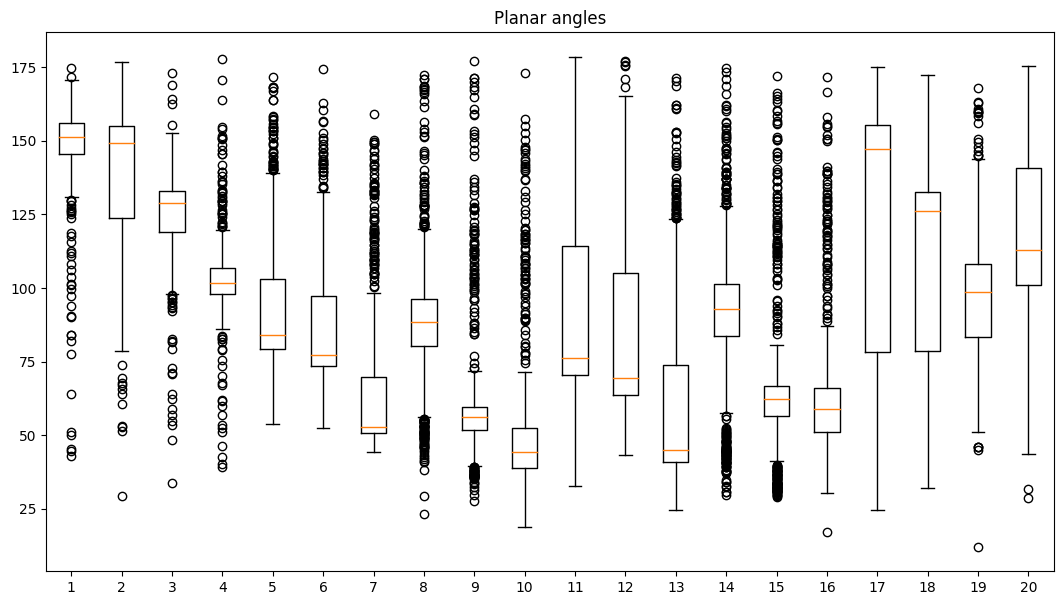

,"(0, 1, 2)","(0, 1, 3)","(0, 1, 4)","(0, 1, 5)","(0, 2, 3)","(0, 2, 4)","(0, 2, 5)","(0, 3, 4)","(0, 3, 5)","(0, 4, 5)","(1, 2, 3)","(1, 2, 4)","(1, 2, 5)","(1, 3, 4)","(1, 3, 5)","(1, 4, 5)","(2, 3, 4)","(2, 3, 5)","(2, 4, 5)","(3, 4, 5)"
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,147.853006,138.324657,124.661619,103.337230,94.554405,88.566110,67.423125,88.908084,63.841390,54.844193,93.527770,86.249331,63.991731,91.035248,67.837831,66.206594,123.911211,107.966128,97.274470,117.595521
std,17.015661,23.793879,15.800704,15.132856,23.263308,21.988146,26.586276,25.967078,27.920494,28.666610,30.280068,29.356533,32.822376,29.583654,29.619093,26.574150,44.892880,36.485552,22.087235,25.625505
min,42.796878,29.302553,33.746092,39.243459,53.919102,52.550781,44.182684,23.131140,27.655818,18.698874,32.884711,43.265837,24.674364,29.749957,28.896706,17.121503,24.542946,32.237572,12.129913,28.793338
25%,145.615387,123.667270,118.873117,97.967535,79.294205,73.618638,50.769325,80.197394,51.637876,38.956373,70.468067,63.697946,40.877213,83.612276,56.436277,51.057316,78.138099,78.687927,83.440453,101.040225
50%,151.266932,149.074339,128.784550,101.692930,83.867166,77.071876,52.720355,88.568885,56.121574,44.259115,76.246621,69.521790,44.910738,92.976398,62.251660,58.746038,147.269497,126.243220,98.725094,112.924511
75%,155.919384,155.130245,132.853519,106.764867,103.209273,97.241776,69.888374,96.351491,59.708244,52.498797,114.252340,105.038311,73.976101,101.348121,66.809460,65.913654,155.196166,132.441215,108.028831,140.868192
max,174.788704,176.577642,173.026452,177.679584,171.468944,174.336270,159.132036,172.338467,177.026667,172.937677,178.490591,177.127373,171.198363,174.546354,171.924916,171.683472,174.876290,172.200789,167.784913,175.314363


In [9]:
plt.figure(figsize=(13,7))
plt.title('Planar angles')
plt.boxplot(planar_angles_full)
plt.show()
planar_angles_full.describe()

In [8]:
#### OLD VERSION ###
torsion_angles = []
for row in data_full.iloc[:,:-1].iterrows():
    tmp = []
    for j in range(0,len(row[1])-3):
        tmp.append(count_torsion_angle(row[1][j], row[1][j+1], row[1][j+2], row[1][j+3]))
    torsion_angles.append(tmp)

torsion_angles_full = pd.DataFrame(torsion_angles)
print(torsion_angles_full)

             0           1          2
0   -91.595442  -87.891688  88.776989
1   -90.639541  -88.132034  88.304147
2   -90.993793  -87.365541  88.297745
3   -89.634132  -89.012277  89.218302
4   -92.241103  -88.259837  88.299287
..         ...         ...        ...
489  89.030738  -91.052544 -88.179292
490 -93.359042  100.814599  87.041052
491 -88.961699  -74.729589  83.707147
492  91.138568  -91.705496 -90.488254
493  90.828216   91.119401 -90.091871

[494 rows x 3 columns]


In [10]:
from itertools import combinations
torsion_angles = []
cols=[]
for row in data_full.iloc[:,:-1].iterrows():
    tmp = []
    for i in range(len(row[1])-3):  
        for j in range(i+1, len(row[1])-2):  
            for k in range(j+1, len(row[1])-1):
                for l in range(k+1, len(row[1])):
                    tmp.append(count_torsion_angle(row[1][i], row[1][j], row[1][k], row[1][l]))
                    if len(cols) < 15:
                        cols.append((i,j,k,l))
    # for combo in combinations(row[1], 4):
    #     tmp.append(count_torsion_angle(combo[0], combo[1], combo[2], combo[3]))
    torsion_angles.append(tmp)

torsion_angles_full = pd.DataFrame(torsion_angles)
torsion_angles_full.columns=cols

### SKALOWANIE ZEBY NIE BYLO UJEMNYCH ###
for i in range(torsion_angles_full.shape[0]):
    torsion_angles_full.iloc[i] = torsion_angles_full.iloc[i].apply(lambda x: x+360 if x < 0 else x)
    
print(torsion_angles_full)

     (0, 1, 2, 3)  (0, 1, 2, 4)  (0, 1, 2, 5)  (0, 1, 3, 4)  (0, 1, 3, 5)  \
0      268.404558    267.369247    267.723436    270.515054    270.802809   
1      269.360459    268.901070    268.881355    270.331803    270.500069   
2      269.006207    268.395138    268.539201    270.368203    270.567663   
3      270.365868    269.986805    269.874088    270.217903    270.295194   
4      267.758897    265.137542    265.721048    270.825983    271.239297   
..            ...           ...           ...           ...           ...   
489     85.769296     86.428831     87.605332     88.855876     89.334971   
490     87.251118     86.953448     87.686281     88.665613     89.224394   
491    269.176568    269.368483    269.431527    270.265230    270.247960   
492     87.106584     87.965739     88.807176     89.402715     89.664552   
493     94.069722     77.906238    280.614739    280.178617    271.219970   

     (0, 1, 4, 5)  (0, 2, 3, 4)  (0, 2, 3, 5)  (0, 2, 4, 5)  (0, 3, 4, 5)  

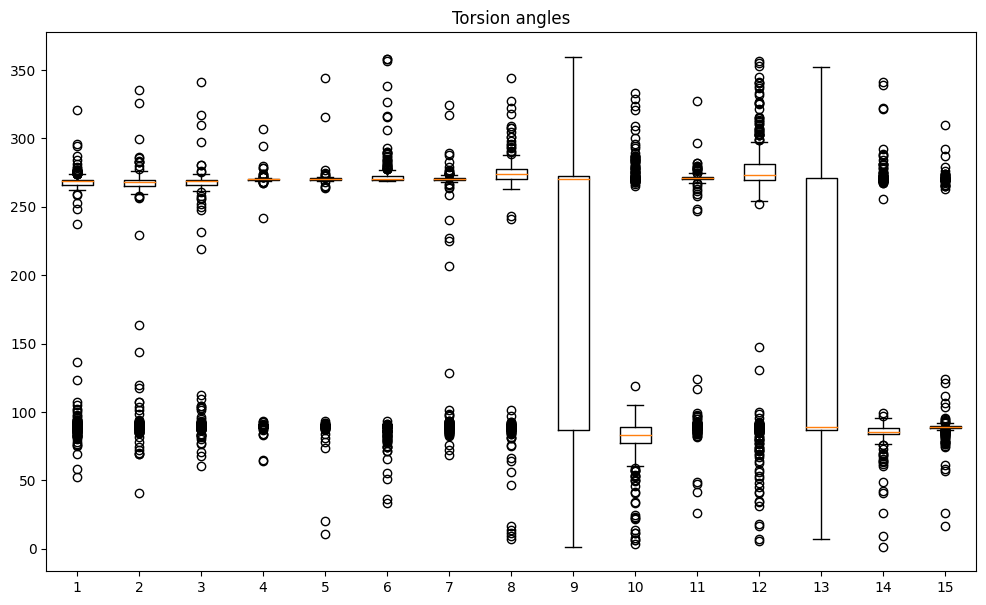

,"(0, 1, 2, 3)","(0, 1, 2, 4)","(0, 1, 2, 5)","(0, 1, 3, 4)","(0, 1, 3, 5)","(0, 1, 4, 5)","(0, 2, 3, 4)","(0, 2, 3, 5)","(0, 2, 4, 5)","(0, 3, 4, 5)","(1, 2, 3, 4)","(1, 2, 3, 5)","(1, 2, 4, 5)","(1, 3, 4, 5)","(2, 3, 4, 5)"
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,229.274761,232.086514,233.408249,242.896917,244.756050,234.843723,242.168824,244.954149,196.414441,113.941779,240.900008,237.051266,167.980565,108.223903,105.907437
std,75.820331,73.160266,72.022608,65.286906,64.505819,77.258396,66.564120,72.076907,98.616116,78.288889,68.676447,85.138484,96.221252,64.670072,54.260127
min,52.787876,40.407219,60.483283,64.259361,10.894363,33.103483,68.683043,7.006959,1.434120,3.267952,26.385759,5.851486,7.284839,1.600601,16.899881
25%,266.309592,265.485288,266.189405,269.853013,269.972796,270.000691,269.977946,270.247212,86.566003,77.524087,270.031323,269.870104,86.544937,83.593097,88.596137
50%,268.793381,268.372947,268.582459,270.264350,270.482259,270.714664,270.649194,273.892532,270.509686,83.244351,270.975609,273.009605,89.384508,85.376873,89.245759
75%,269.377961,269.738743,269.600857,270.534189,270.803774,272.921512,271.464629,277.506099,272.277944,89.146502,271.840637,281.164320,271.255302,88.622403,89.830125
max,320.663406,335.674344,341.399773,307.073315,344.118835,358.051571,324.611247,344.106855,359.754088,333.522552,327.615657,356.319779,352.282794,341.438020,309.554795


In [11]:
plt.figure(figsize=(12,7))
plt.title('Torsion angles')
plt.boxplot(torsion_angles_full)
plt.show()
planar_angles_full.describe()
torsion_angles_full.describe()

In [12]:
distances_full = []
for row in data_full.iloc[:,:-1].iterrows():
    tmp = []
    for j in range(0,len(row[1])):
        for k in range(j+1, len(row[1])):
            tmp.append(count_euclid_dist(row[1][j], row[1][k]))
    distances_full.append(tmp)

distances_full = pd.DataFrame(distances_full)
distances_full.columns = [(j,k) for j in range(0, data.shape[1]-1) for k in range(j+1, data.shape[1]-1)]
print(distances_full)

       (0, 1)     (0, 2)     (0, 3)     (0, 4)     (0, 5)    (1, 2)  \
0    5.733532  12.504305  12.791733  13.500355  10.564200  7.164484   
1    5.440949  12.410280  13.549124  14.526154  10.456760  7.204727   
2    5.547319  12.383069  13.741741  14.524595  10.646189  7.102341   
3    4.895635  12.171124  12.182229  13.757487  10.358555  7.704254   
4    5.422896  12.836306  14.254092  15.298563  10.548249  7.532824   
..        ...        ...        ...        ...        ...       ...   
489  5.313441  10.554578  14.924924  19.026426  21.631722  5.572498   
490  5.750032  10.946584  15.129245  19.462494  21.961079  5.999748   
491  8.358435  14.716773  18.046345  21.396817  22.472122  7.065774   
492  5.387380  10.261155  13.944410  17.270243  21.906878  5.331430   
493  6.224165  10.921993  17.226674  14.259326  18.964900  5.145466   

        (1, 3)     (1, 4)     (1, 5)    (2, 3)     (2, 4)     (2, 5)  \
0     7.325205   9.028184   7.949687  5.126119   9.941123  12.081338   
1  

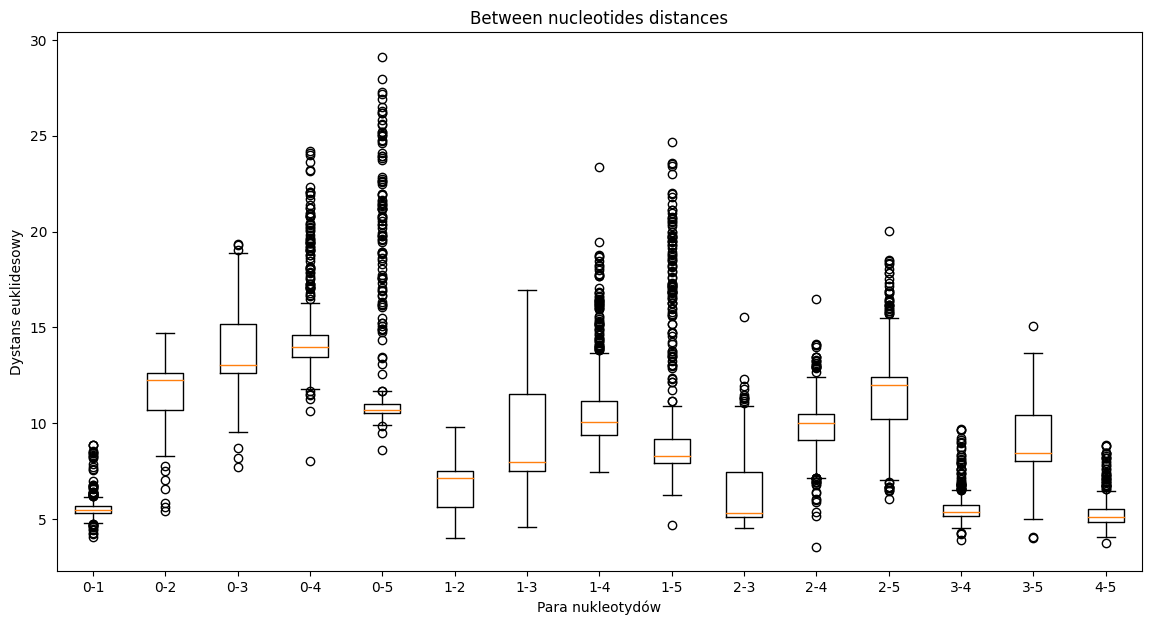

In [13]:
fig, axe = plt.subplots(figsize=(14, 7))
axe.boxplot(distances_full)
#axe.text(0.8, 0.5, f"correlation = {round(cor.correlation, 3)}", bbox=dict(facecolor='red', alpha=0.5), horizontalalignment = 'right', verticalalignment = 'top')
axe.set_title('Between nucleotides distances')
axe.set_xlabel('Para nukleotydów')
axe.set_ylabel('Dystans euklidesowy')
axe.set_xticklabels(list(f'{j}-{k}' for j in range(0, data.shape[1]-1) for k in range(j+1, data.shape[1]-1)))
plt.show()

<h3>Create one big dataframe</h3>

In [14]:
df = pd.concat([planar_angles_full, torsion_angles_full, distances_full], axis=1)
df

,"(0, 1, 2)","(0, 1, 3)","(0, 1, 4)","(0, 1, 5)","(0, 2, 3)","(0, 2, 4)","(0, 2, 5)","(0, 3, 4)","(0, 3, 5)","(0, 4, 5)",...,"(1, 2)","(1, 3)","(1, 4)","(1, 5)","(2, 3)","(2, 4)","(2, 5)","(3, 4)","(3, 5)","(4, 5)"
0,151.433853,156.610852,130.969524,99.809688,81.473986,72.943025,50.860094,86.571218,55.332476,43.123195,...,7.164484,7.325205,9.028184,7.949687,5.126119,9.941123,12.081338,5.148702,8.233006,4.711884
1,157.633789,148.449353,129.654734,102.217303,91.057233,80.670525,52.662660,90.209112,50.382545,31.711883,...,7.204727,8.609981,10.436844,7.852234,5.213086,9.824763,10.988605,5.188187,7.999570,5.213148
2,156.249586,152.574492,129.456448,103.048040,93.600313,79.270366,53.483722,86.341306,50.679322,30.788664,...,7.102341,8.578255,10.353439,7.920222,5.230696,10.238789,11.149645,5.662021,8.134808,4.857419
3,149.227210,127.373339,113.322206,91.947715,78.573351,75.254982,50.666060,91.848172,56.068061,42.331952,...,7.704254,8.572597,11.064033,8.963785,4.877964,10.220153,12.036276,6.011491,9.066458,5.537136
4,164.217632,154.964573,129.608687,103.226354,92.135806,80.616554,51.658154,90.375611,46.681860,24.078928,...,7.532824,9.154753,11.259722,7.891457,5.737500,10.675108,11.110191,5.463139,7.851490,5.464034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,151.645686,136.235939,123.602870,113.644186,134.181511,123.109922,112.476723,127.610124,115.103941,112.753997,...,5.572498,10.627996,15.563947,18.946012,5.507387,11.082314,15.273300,5.798437,10.557958,5.293347
490,137.374252,125.129246,113.696974,102.817955,131.963211,121.805463,109.392171,128.173878,113.396281,109.521511,...,5.999748,11.071102,16.425827,19.957642,5.433609,11.325929,15.747634,6.054852,11.006663,5.571048
491,145.032583,151.724213,139.881447,125.086218,122.620527,113.408675,97.948182,118.834526,100.136825,94.000198,...,7.065774,10.245523,14.316058,16.601482,5.182464,10.749159,15.069213,5.715412,10.586614,5.535906
492,146.393218,128.399196,115.106559,107.750023,124.300640,112.188657,105.411282,117.222769,111.300860,120.480475,...,5.331430,9.943562,14.281033,19.655113,5.289643,10.546559,16.819386,5.642131,12.573194,7.314330


In [15]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

<h2>Data distribution check</h2>

In [16]:
from scipy.stats import shapiro
stat, p_value = shapiro(df)
print(f'Shapiro-Wilk Test: Statistic={stat}, p-value={p_value}')

## rozkład nienormalny

Shapiro-Wilk Test: Statistic=0.836037814617157, p-value=0.0


c:\Users\marce\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [17]:
df_norm = preprocessing.normalize(df) 

<h1> Models testing </h1>

In [18]:
data_full = data_full.reset_index(drop=True)   #base dataframe with nucleotides coords and class
y = data_full['class']
data_full

,N1,N2,N3,N4,N5,N6,class
0,"[72.379, 32.575, 10.796]","[77.895, 33.755, 9.769]","[84.753, 31.765, 9.188]","[84.547, 36.507, 11.124]","[82.675, 41.303, 11.068]","[78.004, 41.475, 11.663]",1
1,"[14.263, 65.819, 16.505]","[12.633, 71.007, 16.327]","[8.943, 76.9, 18.215]","[7.04, 76.843, 13.362]","[8.532, 76.432, 8.41]","[11.439, 72.111, 8.645]",1
2,"[54.509, 39.342, 49.313]","[60.011, 39.781, 49.868]","[66.82, 38.868, 48.066]","[67.582, 37.195, 52.963]","[65.914, 38.341, 58.251]","[61.112, 38.748, 57.643]",1
3,"[2.716, 78.732, 56.751]","[1.84, 82.233, 60.059]","[-1.302, 89.045, 61.814]","[2.221, 90.716, 58.883]","[8.213, 91.183, 58.757]","[9.909, 85.912, 58.753]",1
4,"[13.564, 1.567, 34.626]","[17.065, 3.703, 38.174]","[20.272, 6.608, 44.34]","[24.028, 9.055, 40.759]","[27.216, 8.24, 36.398]","[23.132, 5.894, 33.628]",1
...,...,...,...,...,...,...,...
489,"[18.513, 18.092, 15.376]","[13.348, 19.338, 15.43]","[9.175, 22.979, 14.812]","[7.433, 27.676, 12.524]","[7.529, 32.23, 8.936]","[8.915, 33.856, 4.093]",0
490,"[220.971, 180.798, 225.049]","[222.339, 177.97, 229.865]","[221.535, 172.476, 232.138]","[220.896, 167.117, 231.508]","[220.044, 161.736, 228.866]","[221.215, 158.853, 224.245]",0
491,"[6.588, 9.234, -5.055]","[0.474, 3.535, -4.993]","[-4.577, 0.504, -1.091]","[-4.18, -4.662, -0.978]","[-1.922, -9.904, -0.68]","[2.59, -12.701, -2.25]",0
492,"[125.125, 210.237, 138.94]","[121.62, 213.878, 137.074]","[120.773, 217.881, 133.656]","[122.193, 219.31, 128.765]","[123.666, 217.864, 123.514]","[122.827, 213.852, 117.456]",0


<h3>1. Gaussian Naive bayes - (assumes that data is normally distributed)</h3>
<h5>Which is not here but ok</h5>

In [165]:
from sklearn.naive_bayes import GaussianNB

#df_norm = preprocessing.normalize(df)   

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=12)

gnb = GaussianNB()
model_GNB = gnb.fit(X_train, y_train)

y_pred_GNB = model_GNB.predict(X_test)

confusion_GNB = confusion_matrix(y_test, y_pred_GNB)
print(confusion_GNB)
print(("Accuracy is"), accuracy_score(y_test, y_pred_GNB) * 100)


[[51  4]
 [ 3 41]]
Accuracy is 92.92929292929293


<h3>2. Multinomial Naive Bayes </h3>

In [164]:
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=12)

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred_MNB = clf.predict(X_test)

confusion_MNB = confusion_matrix(y_test, y_pred_MNB)
print(confusion_MNB)
print(("Accuracy is"), accuracy_score(y_test, y_pred_MNB) * 100)

[[49  6]
 [ 4 40]]
Accuracy is 89.8989898989899


<h3>3. Logistic regression </h3>

In [163]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=12)

clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

y_pred_LR = clf.predict(X_test)

confusion_LR = confusion_matrix(y_test, y_pred_LR)
print(confusion_LR)
print(("Accuracy is"), accuracy_score(y_test, y_pred_LR) * 100)

[[46  9]
 [ 3 41]]
Accuracy is 87.87878787878788


<h3>4. Drzewo decyzyjne</h3>

In [162]:
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=12)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

#tree.plot_tree(clf)

y_pred_TC = clf.predict(X_test)

confusion_TC = confusion_matrix(y_test, y_pred_TC)
print(confusion_TC)
print(("Accuracy is"), accuracy_score(y_test, y_pred_TC) * 100)


[[53  2]
 [ 7 37]]
Accuracy is 90.9090909090909


<h3>5. Random forest</h3>

In [155]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=12)

rf = RandomForestClassifier(n_estimators=30)
rf.fit(X_train, y_train)

y_pred_RF = rf.predict(X_test)

confusion_RF = confusion_matrix(y_test, y_pred_RF)
print(confusion_RF)
print(("Accuracy is"), accuracy_score(y_test, y_pred_RF) * 100)

[[51  4]
 [ 3 41]]
Accuracy is 92.92929292929293


<h3>Standaryzacja</h3>

In [19]:
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df))
df_std.columns=df.columns
df_std

,"(0, 1, 2)","(0, 1, 3)","(0, 1, 4)","(0, 1, 5)","(0, 2, 3)","(0, 2, 4)","(0, 2, 5)","(0, 3, 4)","(0, 3, 5)","(0, 4, 5)",...,"(1, 2)","(1, 3)","(1, 4)","(1, 5)","(2, 3)","(2, 4)","(2, 5)","(3, 4)","(3, 5)","(4, 5)"
0,0.210658,0.769304,0.399621,-0.233341,-0.562847,-0.711243,-0.623623,-0.090085,-0.305064,-0.409287,...,0.421555,-0.849438,-0.808853,-0.524787,-0.648824,0.116916,0.214461,-0.574619,-0.567320,-0.796571
1,0.575393,0.425948,0.316326,-0.074081,-0.150482,-0.359448,-0.555754,0.050154,-0.482530,-0.807761,...,0.459043,-0.356136,-0.211327,-0.549228,-0.609563,0.037906,-0.242426,-0.525281,-0.720284,-0.153437
2,0.493962,0.599494,0.303764,-0.019129,-0.041054,-0.423190,-0.524840,-0.098948,-0.471890,-0.839999,...,0.363666,-0.368317,-0.246706,-0.532177,-0.601613,0.319037,-0.175093,0.066798,-0.631667,-0.609846
3,0.080843,-0.460724,-0.718380,-0.753398,-0.687660,-0.605991,-0.630929,0.113338,-0.278692,-0.436917,...,0.924375,-0.370490,0.054714,-0.270454,-0.760853,0.306382,0.195620,0.503478,-0.021186,0.262246
4,0.962714,0.700045,0.313409,-0.007334,-0.104072,-0.361905,-0.593575,0.056572,-0.615208,-1.074297,...,0.764680,-0.146966,0.137721,-0.539391,-0.372818,0.615305,-0.191589,-0.181715,-0.817316,0.168455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,0.223119,-0.087873,-0.067074,0.681788,1.705143,1.572612,1.696336,1.491938,1.837880,2.022161,...,-1.061450,0.418700,1.963487,2.233060,-0.476701,0.891806,1.549065,0.237256,0.956148,-0.050541
490,-0.616454,-0.555134,-0.694637,-0.034349,1.609691,1.513227,1.580198,1.513670,1.776656,1.909286,...,-0.663448,0.588835,2.329079,2.486774,-0.510009,1.057225,1.747391,0.557659,1.250170,0.305755
491,-0.165923,0.563722,0.964214,1.438660,1.207677,1.130962,1.149315,1.153645,1.301275,1.367294,...,0.329603,0.271846,1.434157,1.645058,-0.623387,0.665587,1.463734,0.133512,0.974925,0.260668
492,-0.085878,-0.417566,-0.605337,0.291899,1.279972,1.075420,1.430312,1.091512,1.701531,2.291963,...,-1.286016,0.155905,1.419301,2.410900,-0.575002,0.528018,2.195505,0.041944,2.276669,2.542425


<h3>6. SVM</h3>

In [154]:
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(df_std, y, test_size=0.2, random_state=12)   #lepszy wynik po standaryzacji

clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred_SVM = clf.predict(X_test)

confusion_SVM = confusion_matrix(y_test, y_pred_SVM)
print(confusion_SVM)
print(("Accuracy is"), accuracy_score(y_test, y_pred_SVM) * 100)

[[51  4]
 [ 2 42]]
Accuracy is 93.93939393939394


<h1>Neural networks</h1>

In [20]:
df

,"(0, 1, 2)","(0, 1, 3)","(0, 1, 4)","(0, 1, 5)","(0, 2, 3)","(0, 2, 4)","(0, 2, 5)","(0, 3, 4)","(0, 3, 5)","(0, 4, 5)",...,"(1, 2)","(1, 3)","(1, 4)","(1, 5)","(2, 3)","(2, 4)","(2, 5)","(3, 4)","(3, 5)","(4, 5)"
0,151.433853,156.610852,130.969524,99.809688,81.473986,72.943025,50.860094,86.571218,55.332476,43.123195,...,7.164484,7.325205,9.028184,7.949687,5.126119,9.941123,12.081338,5.148702,8.233006,4.711884
1,157.633789,148.449353,129.654734,102.217303,91.057233,80.670525,52.662660,90.209112,50.382545,31.711883,...,7.204727,8.609981,10.436844,7.852234,5.213086,9.824763,10.988605,5.188187,7.999570,5.213148
2,156.249586,152.574492,129.456448,103.048040,93.600313,79.270366,53.483722,86.341306,50.679322,30.788664,...,7.102341,8.578255,10.353439,7.920222,5.230696,10.238789,11.149645,5.662021,8.134808,4.857419
3,149.227210,127.373339,113.322206,91.947715,78.573351,75.254982,50.666060,91.848172,56.068061,42.331952,...,7.704254,8.572597,11.064033,8.963785,4.877964,10.220153,12.036276,6.011491,9.066458,5.537136
4,164.217632,154.964573,129.608687,103.226354,92.135806,80.616554,51.658154,90.375611,46.681860,24.078928,...,7.532824,9.154753,11.259722,7.891457,5.737500,10.675108,11.110191,5.463139,7.851490,5.464034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,151.645686,136.235939,123.602870,113.644186,134.181511,123.109922,112.476723,127.610124,115.103941,112.753997,...,5.572498,10.627996,15.563947,18.946012,5.507387,11.082314,15.273300,5.798437,10.557958,5.293347
490,137.374252,125.129246,113.696974,102.817955,131.963211,121.805463,109.392171,128.173878,113.396281,109.521511,...,5.999748,11.071102,16.425827,19.957642,5.433609,11.325929,15.747634,6.054852,11.006663,5.571048
491,145.032583,151.724213,139.881447,125.086218,122.620527,113.408675,97.948182,118.834526,100.136825,94.000198,...,7.065774,10.245523,14.316058,16.601482,5.182464,10.749159,15.069213,5.715412,10.586614,5.535906
492,146.393218,128.399196,115.106559,107.750023,124.300640,112.188657,105.411282,117.222769,111.300860,120.480475,...,5.331430,9.943562,14.281033,19.655113,5.289643,10.546559,16.819386,5.642131,12.573194,7.314330


<h3>Feedforward Neural Network - basic one

In [150]:
import tensorflow as tf
from tensorflow import keras

X_train, X_test, y_train, y_test = train_test_split(df_std, y, test_size=0.2, random_state=12)

model = keras.Sequential(
    [
        keras.layers.Dense(50, activation="relu", name="input_layer"),  
        keras.layers.Dropout(rate=0.5), 
        keras.layers.Dense(32, activation="relu", name="hidden_layer_1"), 
        keras.layers.Dense(16, activation="relu", name="hidden_layer_2"), 
        keras.layers.Dense(1,  activation='sigmoid', name="output_layer"),
    ]
)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpoint = keras.callbacks.ModelCheckpoint('best_model', save_best_only=True, monitor='loss', mode='min', verbose=0)

model.fit(X_train, y_train, epochs=10, callbacks=checkpoint)  

Epoch 1/10
13/13 [==============================] - 1s 62ms/step - loss: 0.7458 - accuracy: 0.6000
Epoch 2/10
13/13 [==============================] - 1s 61ms/step - loss: 0.5147 - accuracy: 0.8405
Epoch 3/10
13/13 [==============================] - 1s 66ms/step - loss: 0.3773 - accuracy: 0.9089
Epoch 4/10
13/13 [==============================] - 1s 60ms/step - loss: 0.2842 - accuracy: 0.9291
Epoch 5/10
13/13 [==============================] - 1s 60ms/step - loss: 0.2355 - accuracy: 0.9367
Epoch 6/10
13/13 [==============================] - 1s 62ms/step - loss: 0.2058 - accuracy: 0.9418
Epoch 7/10
13/13 [==============================] - 1s 63ms/step - loss: 0.2057 - accuracy: 0.9342
Epoch 8/10
13/13 [==============================] - 1s 94ms/step - loss: 0.1893 - accuracy: 0.9468
Epoch 9/10
13/13 [==============================] - 1s 70ms/step - loss: 0.1888 - accuracy: 0.9468
Epoch 10/10
13/13 [==============================] - 1s 63ms/step - loss: 0.1716 - accuracy: 0.9544


In [151]:
y_pred_NN = model.predict(X_test)
y_pred_NN = np.where(y_pred_NN > 0.5, 1, 0)
#print(y_pred_NN)
#print(y_test)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Accuracy: {test_acc} loss: {test_loss}')

confusion_NN = confusion_matrix(y_test, y_pred_NN)
print(confusion_NN)
print(("Accuracy is"), accuracy_score(y_test, y_pred_NN) * 100)

4/4 [==============================] - 0s 2ms/step - loss: 0.1823 - accuracy: 0.9394
Accuracy: 0.939393937587738 loss: 0.18225161731243134
[[51  4]
 [ 2 42]]
Accuracy is 93.93939393939394


In [142]:
import tensorflow as tf
from tensorflow import keras

X_train, X_test, y_train, y_test = train_test_split(df_std, y, test_size=0.2, random_state=12)

model = keras.Sequential(
    [
        keras.layers.Dense(50, activation="relu", name="input_layer"),
        keras.layers.Dropout(rate=0.5), 
        keras.layers.Dense(32, activation="relu", name="hidden_layer_1"),  
        keras.layers.Dense(2,  activation='softmax', name="output_layer"),
    ]
)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint = keras.callbacks.ModelCheckpoint('best_model', save_best_only=True, monitor='loss', mode='min', verbose=0)
  
model.fit(X_train, y_train, epochs=10, callbacks=checkpoint)   

Epoch 1/10
13/13 [==============================] - 1s 52ms/step - loss: 0.5432 - accuracy: 0.7063
Epoch 2/10
13/13 [==============================] - 1s 52ms/step - loss: 0.3053 - accuracy: 0.9063
Epoch 3/10
13/13 [==============================] - 1s 56ms/step - loss: 0.2079 - accuracy: 0.9443
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.9443
Epoch 5/10
13/13 [==============================] - 1s 53ms/step - loss: 0.1742 - accuracy: 0.9443
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.1791 - accuracy: 0.9519
Epoch 7/10
13/13 [==============================] - 1s 51ms/step - loss: 0.1670 - accuracy: 0.9443
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.1717 - accuracy: 0.9544
Epoch 9/10
13/13 [==============================] - 1s 52ms/step - loss: 0.1578 - accuracy: 0.9570
Epoch 10/10
13/13 [==============================] - 0s 2ms/step - loss: 0.1685 - accuracy: 0.9468


In [143]:
y_pred_NN = model.predict(X_test)
y_pred_NN = np.where(y_pred_NN > 0.5, 1, 0)
#print(y_pred_NN)
#print(y_test)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

confusion_NN = confusion_matrix(y_test, [x[1] for x in y_pred_NN])
print(confusion_NN)
print(("Accuracy is"), accuracy_score(y_test, [x[1] for x in y_pred_NN]) * 100)

4/4 [==============================] - 0s 0s/step - loss: 0.1880 - accuracy: 0.9293
0.9292929172515869
[[50  5]
 [ 2 42]]
Accuracy is 92.92929292929293


<h2> Graph neural network </h2>

Full dataset

In [22]:
df_std
#df

,"(0, 1, 2)","(0, 1, 3)","(0, 1, 4)","(0, 1, 5)","(0, 2, 3)","(0, 2, 4)","(0, 2, 5)","(0, 3, 4)","(0, 3, 5)","(0, 4, 5)",...,"(1, 2)","(1, 3)","(1, 4)","(1, 5)","(2, 3)","(2, 4)","(2, 5)","(3, 4)","(3, 5)","(4, 5)"
0,0.210658,0.769304,0.399621,-0.233341,-0.562847,-0.711243,-0.623623,-0.090085,-0.305064,-0.409287,...,0.421555,-0.849438,-0.808853,-0.524787,-0.648824,0.116916,0.214461,-0.574619,-0.567320,-0.796571
1,0.575393,0.425948,0.316326,-0.074081,-0.150482,-0.359448,-0.555754,0.050154,-0.482530,-0.807761,...,0.459043,-0.356136,-0.211327,-0.549228,-0.609563,0.037906,-0.242426,-0.525281,-0.720284,-0.153437
2,0.493962,0.599494,0.303764,-0.019129,-0.041054,-0.423190,-0.524840,-0.098948,-0.471890,-0.839999,...,0.363666,-0.368317,-0.246706,-0.532177,-0.601613,0.319037,-0.175093,0.066798,-0.631667,-0.609846
3,0.080843,-0.460724,-0.718380,-0.753398,-0.687660,-0.605991,-0.630929,0.113338,-0.278692,-0.436917,...,0.924375,-0.370490,0.054714,-0.270454,-0.760853,0.306382,0.195620,0.503478,-0.021186,0.262246
4,0.962714,0.700045,0.313409,-0.007334,-0.104072,-0.361905,-0.593575,0.056572,-0.615208,-1.074297,...,0.764680,-0.146966,0.137721,-0.539391,-0.372818,0.615305,-0.191589,-0.181715,-0.817316,0.168455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,0.223119,-0.087873,-0.067074,0.681788,1.705143,1.572612,1.696336,1.491938,1.837880,2.022161,...,-1.061450,0.418700,1.963487,2.233060,-0.476701,0.891806,1.549065,0.237256,0.956148,-0.050541
490,-0.616454,-0.555134,-0.694637,-0.034349,1.609691,1.513227,1.580198,1.513670,1.776656,1.909286,...,-0.663448,0.588835,2.329079,2.486774,-0.510009,1.057225,1.747391,0.557659,1.250170,0.305755
491,-0.165923,0.563722,0.964214,1.438660,1.207677,1.130962,1.149315,1.153645,1.301275,1.367294,...,0.329603,0.271846,1.434157,1.645058,-0.623387,0.665587,1.463734,0.133512,0.974925,0.260668
492,-0.085878,-0.417566,-0.605337,0.291899,1.279972,1.075420,1.430312,1.091512,1.701531,2.291963,...,-1.286016,0.155905,1.419301,2.410900,-0.575002,0.528018,2.195505,0.041944,2.276669,2.542425


Full dataset with nucleotides - one for each node of graph

In [23]:
df_std_nucs = df_std.copy()
df_std_nucs['seq'] = seqs
df_std_nucs

,"(0, 1, 2)","(0, 1, 3)","(0, 1, 4)","(0, 1, 5)","(0, 2, 3)","(0, 2, 4)","(0, 2, 5)","(0, 3, 4)","(0, 3, 5)","(0, 4, 5)",...,"(1, 3)","(1, 4)","(1, 5)","(2, 3)","(2, 4)","(2, 5)","(3, 4)","(3, 5)","(4, 5)",seq
0,0.210658,0.769304,0.399621,-0.233341,-0.562847,-0.711243,-0.623623,-0.090085,-0.305064,-0.409287,...,-0.849438,-0.808853,-0.524787,-0.648824,0.116916,0.214461,-0.574619,-0.567320,-0.796571,CGAAAG
1,0.575393,0.425948,0.316326,-0.074081,-0.150482,-0.359448,-0.555754,0.050154,-0.482530,-0.807761,...,-0.356136,-0.211327,-0.549228,-0.609563,0.037906,-0.242426,-0.525281,-0.720284,-0.153437,CGAAGG
2,0.493962,0.599494,0.303764,-0.019129,-0.041054,-0.423190,-0.524840,-0.098948,-0.471890,-0.839999,...,-0.368317,-0.246706,-0.532177,-0.601613,0.319037,-0.175093,0.066798,-0.631667,-0.609846,CGAAGG
3,0.080843,-0.460724,-0.718380,-0.753398,-0.687660,-0.605991,-0.630929,0.113338,-0.278692,-0.436917,...,-0.370490,0.054714,-0.270454,-0.760853,0.306382,0.195620,0.503478,-0.021186,0.262246,CGAAAG
4,0.962714,0.700045,0.313409,-0.007334,-0.104072,-0.361905,-0.593575,0.056572,-0.615208,-1.074297,...,-0.146966,0.137721,-0.539391,-0.372818,0.615305,-0.191589,-0.181715,-0.817316,0.168455,GGGAGC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,0.223119,-0.087873,-0.067074,0.681788,1.705143,1.572612,1.696336,1.491938,1.837880,2.022161,...,0.418700,1.963487,2.233060,-0.476701,0.891806,1.549065,0.237256,0.956148,-0.050541,GCCGCU
490,-0.616454,-0.555134,-0.694637,-0.034349,1.609691,1.513227,1.580198,1.513670,1.776656,1.909286,...,0.588835,2.329079,2.486774,-0.510009,1.057225,1.747391,0.557659,1.250170,0.305755,UACCUG
491,-0.165923,0.563722,0.964214,1.438660,1.207677,1.130962,1.149315,1.153645,1.301275,1.367294,...,0.271846,1.434157,1.645058,-0.623387,0.665587,1.463734,0.133512,0.974925,0.260668,UGAUGA
492,-0.085878,-0.417566,-0.605337,0.291899,1.279972,1.075420,1.430312,1.091512,1.701531,2.291963,...,0.155905,1.419301,2.410900,-0.575002,0.528018,2.195505,0.041944,2.276669,2.542425,AGACUC


In [134]:
###save/read

#df_std_nucs.to_csv("df_std_nucs.csv")
df_std_nucs = pd.read_csv("df_std_nucs.csv", index_col=0)
df_std_nucs

,"(0, 1, 2)","(0, 1, 3)","(0, 1, 4)","(0, 1, 5)","(0, 2, 3)","(0, 2, 4)","(0, 2, 5)","(0, 3, 4)","(0, 3, 5)","(0, 4, 5)",...,"(1, 3)","(1, 4)","(1, 5)","(2, 3)","(2, 4)","(2, 5)","(3, 4)","(3, 5)","(4, 5)",seq
0,0.210658,0.769304,0.399621,-0.233341,-0.562847,-0.711243,-0.623623,-0.090085,-0.305064,-0.409287,...,-0.849438,-0.808853,-0.524787,-0.648824,0.116916,0.214461,-0.574619,-0.567320,-0.796571,CGAAAG
1,0.575393,0.425948,0.316326,-0.074081,-0.150482,-0.359448,-0.555754,0.050154,-0.482530,-0.807761,...,-0.356136,-0.211327,-0.549228,-0.609563,0.037906,-0.242426,-0.525281,-0.720284,-0.153437,CGAAGG
2,0.493962,0.599494,0.303764,-0.019129,-0.041054,-0.423190,-0.524840,-0.098948,-0.471890,-0.839999,...,-0.368317,-0.246706,-0.532177,-0.601613,0.319037,-0.175093,0.066798,-0.631667,-0.609846,CGAAGG
3,0.080843,-0.460724,-0.718380,-0.753398,-0.687660,-0.605991,-0.630929,0.113338,-0.278692,-0.436917,...,-0.370490,0.054714,-0.270454,-0.760853,0.306382,0.195620,0.503478,-0.021186,0.262246,CGAAAG
4,0.962714,0.700045,0.313409,-0.007334,-0.104072,-0.361905,-0.593575,0.056572,-0.615208,-1.074297,...,-0.146966,0.137721,-0.539391,-0.372818,0.615305,-0.191589,-0.181715,-0.817316,0.168455,GGGAGC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,0.223119,-0.087873,-0.067074,0.681788,1.705143,1.572612,1.696336,1.491938,1.837880,2.022161,...,0.418700,1.963487,2.233060,-0.476701,0.891806,1.549065,0.237256,0.956148,-0.050541,GCCGCU
490,-0.616454,-0.555134,-0.694637,-0.034349,1.609691,1.513227,1.580198,1.513670,1.776656,1.909286,...,0.588835,2.329079,2.486774,-0.510009,1.057225,1.747391,0.557659,1.250170,0.305755,UACCUG
491,-0.165923,0.563722,0.964214,1.438660,1.207677,1.130962,1.149315,1.153645,1.301275,1.367294,...,0.271846,1.434157,1.645058,-0.623387,0.665587,1.463734,0.133512,0.974925,0.260668,UGAUGA
492,-0.085878,-0.417566,-0.605337,0.291899,1.279972,1.075420,1.430312,1.091512,1.701531,2.291963,...,0.155905,1.419301,2.410900,-0.575002,0.528018,2.195505,0.041944,2.276669,2.542425,AGACUC


In [84]:
df_nucs = df.copy()
df_nucs['seq'] = seqs
df_nucs

,"(0, 1, 2)","(0, 1, 3)","(0, 1, 4)","(0, 1, 5)","(0, 2, 3)","(0, 2, 4)","(0, 2, 5)","(0, 3, 4)","(0, 3, 5)","(0, 4, 5)",...,"(1, 3)","(1, 4)","(1, 5)","(2, 3)","(2, 4)","(2, 5)","(3, 4)","(3, 5)","(4, 5)",seq
0,151.433853,156.610852,130.969524,99.809688,81.473986,72.943025,50.860094,86.571218,55.332476,43.123195,...,7.325205,9.028184,7.949687,5.126119,9.941123,12.081338,5.148702,8.233006,4.711884,CGAAAG
1,157.633789,148.449353,129.654734,102.217303,91.057233,80.670525,52.662660,90.209112,50.382545,31.711883,...,8.609981,10.436844,7.852234,5.213086,9.824763,10.988605,5.188187,7.999570,5.213148,CGAAGG
2,156.249586,152.574492,129.456448,103.048040,93.600313,79.270366,53.483722,86.341306,50.679322,30.788664,...,8.578255,10.353439,7.920222,5.230696,10.238789,11.149645,5.662021,8.134808,4.857419,CGAAGG
3,149.227210,127.373339,113.322206,91.947715,78.573351,75.254982,50.666060,91.848172,56.068061,42.331952,...,8.572597,11.064033,8.963785,4.877964,10.220153,12.036276,6.011491,9.066458,5.537136,CGAAAG
4,164.217632,154.964573,129.608687,103.226354,92.135806,80.616554,51.658154,90.375611,46.681860,24.078928,...,9.154753,11.259722,7.891457,5.737500,10.675108,11.110191,5.463139,7.851490,5.464034,GGGAGC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,151.645686,136.235939,123.602870,113.644186,134.181511,123.109922,112.476723,127.610124,115.103941,112.753997,...,10.627996,15.563947,18.946012,5.507387,11.082314,15.273300,5.798437,10.557958,5.293347,GCCGCU
490,137.374252,125.129246,113.696974,102.817955,131.963211,121.805463,109.392171,128.173878,113.396281,109.521511,...,11.071102,16.425827,19.957642,5.433609,11.325929,15.747634,6.054852,11.006663,5.571048,UACCUG
491,145.032583,151.724213,139.881447,125.086218,122.620527,113.408675,97.948182,118.834526,100.136825,94.000198,...,10.245523,14.316058,16.601482,5.182464,10.749159,15.069213,5.715412,10.586614,5.535906,UGAUGA
492,146.393218,128.399196,115.106559,107.750023,124.300640,112.188657,105.411282,117.222769,111.300860,120.480475,...,9.943562,14.281033,19.655113,5.289643,10.546559,16.819386,5.642131,12.573194,7.314330,AGACUC


<h3>Creating dataset of graphs</h3>

In [91]:
X_train, X_test, y_train, y_test = train_test_split(df_std_nucs, y, test_size=0.2, random_state=12)
df_train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
df_test = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [92]:
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import torch


def get_graph(row, cols):
        edges_dict = {(0,1): [], (0,2): [], (0,3): [], (0,4): [], (0,5): [], 
                      (1,2): [], (1,3): [], (1,4): [], (1,5): [], 
                      (2,3): [], (2,4): [], (2,5): [], 
                      (3,4): [], (3,5): [], 
                      (4,5): []}

        for i in range(len(cols)):
            weigth = row[i]
            if len(cols[i]) == 4:
                edges_dict[(cols[i][0], cols[i][1])].append(weigth)
                edges_dict[(cols[i][0], cols[i][2])].append(weigth)
                edges_dict[(cols[i][0], cols[i][3])].append(weigth)
                edges_dict[(cols[i][1], cols[i][2])].append(weigth)
                edges_dict[(cols[i][1], cols[i][3])].append(weigth)
                edges_dict[(cols[i][2], cols[i][3])].append(weigth)
            elif len(cols[i]) == 3:
                edges_dict[(cols[i][0], cols[i][1])].append(weigth)
                edges_dict[(cols[i][0], cols[i][2])].append(weigth)
                edges_dict[(cols[i][1], cols[i][2])].append(weigth)
            else:
                edges_dict[(cols[i][0], cols[i][1])].append(weigth)

        edge_index_list = torch.tensor([edge for edge in edges_dict.keys()], dtype=torch.int64).t().contiguous()
        edge_weights = torch.tensor([w for w in edges_dict.values()], dtype=torch.float)

        #make graph undirected
        edge_index_symmetric = torch.cat([edge_index_list, edge_index_list.flip(0)], dim=1)
        edge_weights_symmetric = torch.cat([edge_weights, edge_weights])

        d = {'A': 1, 'U': 2, 'C': 3, 'G': 4}
        y = torch.tensor([row['class']], dtype=torch.int64)
        x = torch.tensor([d[n] for n in row['seq']], dtype=torch.int32)

        graph = Data(edge_index=edge_index_symmetric, edge_attr=edge_weights_symmetric, y=y, x=x)
        graph.num_nodes = 6

        return graph

cols = df_train.columns[:-2]
train_dataset = df_train.apply(lambda x: get_graph(x, cols), axis=1)
test_dataset = df_test.apply(lambda x: get_graph(x, cols), axis=1)

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

Number of training graphs: 395
Number of test graphs: 99


In [87]:
data = train_dataset[0]  # Get the first graph object.

print(data)
print('=============================================================')

# Gather some statistics about the first graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

print('=============================================================')
print(data.x)
print(data.y)
print(data.edge_index)
print(data.edge_attr)

Data(x=[6], edge_index=[2, 30], edge_attr=[30, 11], y=[1], num_nodes=6)
Number of nodes: 6
Number of edges: 30
Average node degree: 5.00
Has isolated nodes: False
Has self-loops: False
Is undirected: True
tensor([2, 4, 1, 1, 1, 1], dtype=torch.int32)
tensor([1])
tensor([[0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 1, 2, 3, 4, 5, 2, 3, 4, 5,
         3, 4, 5, 4, 5, 5],
        [1, 2, 3, 4, 5, 2, 3, 4, 5, 3, 4, 5, 4, 5, 5, 0, 0, 0, 0, 0, 1, 1, 1, 1,
         2, 2, 2, 3, 3, 4]])
tensor([[150.4873, 162.9643, 134.4363, 100.7642, 267.0197, 261.2109, 263.9326,
         270.5741, 270.9251,  36.4448,   6.0784],
        [150.4873,  86.2216,  74.0747,  51.9866, 267.0197, 261.2109, 263.9326,
         272.0359, 277.5193,  80.4667,  12.6796],
        [162.9643,  86.2216,  82.6663,  54.4887, 267.0197, 270.5741, 270.9251,
         272.0359, 277.5193,  82.0932,  13.3627],
        [134.4363,  74.0747,  82.6663,  46.6950, 261.2109, 270.5741,  36.4448,
         272.0359,  80.4667,  82.0932,  13.6609],
  

In [88]:
#można regulować rozmiar batcha
train_loader = DataLoader(train_dataset, shuffle=True)
test_loader = DataLoader(test_dataset, shuffle=True)

In [89]:
for step, data in enumerate(train_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data)
    print()

Step 1:
Number of graphs in the current batch: 1
DataBatch(x=[6], edge_index=[2, 30], edge_attr=[30, 11], y=[1], num_nodes=6, batch=[6], ptr=[2])

Step 2:
Number of graphs in the current batch: 1
DataBatch(x=[6], edge_index=[2, 30], edge_attr=[30, 11], y=[1], num_nodes=6, batch=[6], ptr=[2])

Step 3:
Number of graphs in the current batch: 1
DataBatch(x=[6], edge_index=[2, 30], edge_attr=[30, 11], y=[1], num_nodes=6, batch=[6], ptr=[2])

Step 4:
Number of graphs in the current batch: 1
DataBatch(x=[6], edge_index=[2, 30], edge_attr=[30, 11], y=[1], num_nodes=6, batch=[6], ptr=[2])

Step 5:
Number of graphs in the current batch: 1
DataBatch(x=[6], edge_index=[2, 30], edge_attr=[30, 11], y=[1], num_nodes=6, batch=[6], ptr=[2])

Step 6:
Number of graphs in the current batch: 1
DataBatch(x=[6], edge_index=[2, 30], edge_attr=[30, 11], y=[1], num_nodes=6, batch=[6], ptr=[2])

Step 7:
Number of graphs in the current batch: 1
DataBatch(x=[6], edge_index=[2, 30], edge_attr=[30, 11], y=[1], num_n

<h3>Creating a model</h3>

In [90]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv
from sklearn.metrics import accuracy_score

# Define your GNN model
class GNNClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNClassifier, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        print(f"x: {x}  \nedge_index: {edge_index} \nedge_attr:  {edge_attr}")
        x = self.conv1(x, edge_index, edge_attr)
        print(f'AAAAAAAAAAA {x}')
        x = torch.relu(x)
        x = self.conv2(x, edge_index, edge_attr)
        return torch.sigmoid(x)

# Initialize your model, optimizer, and loss function
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GNNClassifier(input_dim=12, hidden_dim=64, output_dim=1)
#.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.BCELoss()

# Training function
def train(model, train_loader, optimizer, criterion):
    model.train()
    for data in train_loader:
        print('run+')
        #data = data.to(device)
        optimizer.zero_grad()
        output = model(data)
        #.squeeze()
        loss = criterion(output, data.y.float())
        loss.backward()
        optimizer.step()

# # Evaluation function
# def evaluate(model, loader):
#     model.eval()
#     y_true, y_pred = [], []
#     with torch.no_grad():
#         for data in loader:
#             data = data.to(device)
#             output = model(data).squeeze().cpu().numpy()
#             y_pred.extend(output.round().astype(int))
#             y_true.extend(data.y.cpu().numpy())
#     accuracy = accuracy_score(y_true, y_pred)
#     return accuracy

# Training loop
num_epochs = 1
for epoch in range(num_epochs):
    train(model, train_loader, optimizer, criterion)
    # train_acc = evaluate(model, train_loader)
    # test_acc = evaluate(model, test_loader)
    #print(f'Epoch {epoch+1}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

run+
x: tensor([4, 4, 1, 1, 1, 3], dtype=torch.int32)  
edge_index: tensor([[0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 1, 2, 3, 4, 5, 2, 3, 4, 5,
         3, 4, 5, 4, 5, 5],
        [1, 2, 3, 4, 5, 2, 3, 4, 5, 3, 4, 5, 4, 5, 5, 0, 0, 0, 0, 0, 1, 1, 1, 1,
         2, 2, 2, 3, 3, 4]]) 
edge_attr:  tensor([[160.0989, 155.6955, 129.1742,  98.8833, 268.3615, 267.2892, 267.9994,
         270.9268, 271.6083,  79.2317,   5.3594],
        [160.0989,  79.4835,  72.1594,  51.3235, 268.3615, 267.2892, 267.9994,
         271.6424, 281.3408,  86.0729,  12.4152],
        [155.6955,  79.4835,  86.0191,  56.7054, 268.3615, 270.9268, 271.6083,
         271.6424, 281.3408,  82.9282,  12.4756],
        [129.1742,  72.1594,  86.0191,  47.1210, 267.2892, 270.9268,  79.2317,
         271.6424,  86.0729,  82.9282,  13.0285],
        [ 98.8833,  51.3235,  56.7054,  47.1210, 267.9994, 271.6083,  79.2317,
         281.3408,  86.0729,  82.9282,  10.4762],
        [160.0989,  72.4018,  64.2858,  43.7806, 268.36

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got -2)

<h3>Trying with tensorflow</h3>

In [129]:
import tensorflow as tf
import numpy as np

def get_graph(row, cols):
    edges_dict = {(0,1): [], (0,2): [], (0,3): [], (0,4): [], (0,5): [], 
                  (1,2): [], (1,3): [], (1,4): [], (1,5): [], 
                  (2,3): [], (2,4): [], (2,5): [], 
                  (3,4): [], (3,5): [], 
                  (4,5): []}

    for i in range(len(cols)):
        weight = row[i]
        if len(cols[i]) == 4:
            edges_dict[(cols[i][0], cols[i][1])].append(weight)
            edges_dict[(cols[i][0], cols[i][2])].append(weight)
            edges_dict[(cols[i][0], cols[i][3])].append(weight)
            edges_dict[(cols[i][1], cols[i][2])].append(weight)
            edges_dict[(cols[i][1], cols[i][3])].append(weight)
            edges_dict[(cols[i][2], cols[i][3])].append(weight)
        elif len(cols[i]) == 3:
            edges_dict[(cols[i][0], cols[i][1])].append(weight)
            edges_dict[(cols[i][0], cols[i][2])].append(weight)
            edges_dict[(cols[i][1], cols[i][2])].append(weight)
        else:
            edges_dict[(cols[i][0], cols[i][1])].append(weight)

    edge_index_list = np.array([edge for edge in edges_dict.keys()], dtype=np.float32).T
    edge_weights = np.array([w for w in edges_dict.values()], dtype=np.float32)

    # Convert numpy arrays to TensorFlow tensors
    edge_index_list_tf = tf.convert_to_tensor(edge_index_list)
    edge_weights_tf = tf.convert_to_tensor(edge_weights)

    # Create symmetric adjacency matrix
    edge_index_symmetric = tf.concat([edge_index_list_tf, tf.reverse(edge_index_list_tf, axis=[0])], axis=1)
    edge_weights_symmetric = tf.concat([edge_weights_tf, edge_weights_tf], axis=0)

    d = {'A': 1, 'U': 2, 'C': 3, 'G': 4}
    y = tf.constant([row['class']], dtype=tf.float32)
    x = tf.constant([d[n] for n in row['seq']], dtype=tf.float32)

    return edge_index_symmetric, edge_weights_symmetric, x, y

# Assuming df_train and df_test are your dataframes containing training and test data

# Assuming cols is a list of column names containing your features
cols = df_train.columns[:-2]

# Create TensorFlow datasets
train_dataset = []
for _, row in df_train.iterrows():
    edge_index, edge_weights, x, y = get_graph(row, cols)
    train_dataset.append((edge_index, edge_weights, x, y))

test_dataset = []
for _, row in df_test.iterrows():
    edge_index, edge_weights, x, y = get_graph(row, cols)
    test_dataset.append((edge_index, edge_weights, x, y))

# print(train_dataset[0])
# print(train_dataset[1])


# Shuffle and batch datasets
#batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices(train_dataset)
test_dataset = tf.data.Dataset.from_tensor_slices(test_dataset)
#shuffle(buffer_size=len(train_dataset))\
#.batch(batch_size)


(<tf.Tensor: shape=(2, 30), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 1., 1., 1., 1., 2., 2., 2., 3., 3., 4., 1.,
        2., 3., 4., 5., 2., 3., 4., 5., 3., 4., 5., 4., 5., 5.],
       [1., 2., 3., 4., 5., 2., 3., 4., 5., 3., 4., 5., 4., 5., 5., 0.,
        0., 0., 0., 0., 1., 1., 1., 1., 2., 2., 2., 3., 3., 4.]],
      dtype=float32)>, <tf.Tensor: shape=(30, 11), dtype=float32, numpy=
array([[ 0.1549723 ,  1.0365964 ,  0.6192495 , -0.17020145,  0.49832594,
         0.39849406,  0.4242458 ,  0.42436138,  0.4060971 , -2.5705945 ,
         0.82878786],
       [ 0.1549723 , -0.35855812, -0.65972203, -0.58120877,  0.49832594,
         0.39849406,  0.4242458 ,  0.44915175,  0.45226905, -1.1769403 ,
         0.7754246 ],
       [ 1.0365964 , -0.35855812, -0.24061689, -0.335315  ,  0.49832594,
         0.42436138,  0.4060971 ,  0.44915175,  0.45226905, -0.4072205 ,
        -0.2515449 ],
       [ 0.6192495 , -0.65972203, -0.24061689, -0.28456268,  0.39849406,
         0.42436138, -2.5

InvalidArgumentError: {{function_node __wrapped__Pack_N_4_device_/job:localhost/replica:0/task:0/device:CPU:0}} Shapes of all inputs must match: values[0].shape = [2,30] != values[1].shape = [30,11] [Op:Pack] name: 0

In [131]:
import tensorflow as tf
import tensorflow_gnn as tfgnn
import numpy as np

def get_graph(row, cols):
    edges_dict = {(0,1): [], (0,2): [], (0,3): [], (0,4): [], (0,5): [], 
                  (1,2): [], (1,3): [], (1,4): [], (1,5): [], 
                  (2,3): [], (2,4): [], (2,5): [], 
                  (3,4): [], (3,5): [], 
                  (4,5): []}

    for i in range(len(cols)):
        weight = row[i]
        if len(cols[i]) == 4:
            edges_dict[(cols[i][0], cols[i][1])].append(weight)
            edges_dict[(cols[i][0], cols[i][2])].append(weight)
            edges_dict[(cols[i][0], cols[i][3])].append(weight)
            edges_dict[(cols[i][1], cols[i][2])].append(weight)
            edges_dict[(cols[i][1], cols[i][3])].append(weight)
            edges_dict[(cols[i][2], cols[i][3])].append(weight)
        elif len(cols[i]) == 3:
            edges_dict[(cols[i][0], cols[i][1])].append(weight)
            edges_dict[(cols[i][0], cols[i][2])].append(weight)
            edges_dict[(cols[i][1], cols[i][2])].append(weight)
        else:
            edges_dict[(cols[i][0], cols[i][1])].append(weight)

    edge_index_list = [edge for edge in edges_dict.keys()]
    edge_weights = [w for w in edges_dict.values()]

    # # Convert numpy arrays to TensorFlow tensors
    # edge_index_list_tf = tf.convert_to_tensor(edge_index_list)
    # edge_weights_tf = tf.convert_to_tensor(edge_weights)

    # # Create symmetric adjacency matrix
    # edge_index_symmetric = tf.concat([edge_index_list_tf, tf.reverse(edge_index_list_tf, axis=[0])], axis=1)
    # edge_weights_symmetric = tf.concat([edge_weights_tf, edge_weights_tf], axis=0)

    d = {'A': 1, 'U': 2, 'C': 3, 'G': 4}
    y = [row['class']]
    x = [d[n] for n in row['seq']]

    graph = tfgnn.GraphTensor(
        node_features=tf.RaggedTensor.from_tensor_slices(x),
        edge_index=tf.constant(edge_index_list, dtype=tf.int64),
        num_nodes=len(x)
        #features=edge_weights
    )

    return graph


cols = df_train.columns[:-2]

# Create TensorFlow datasets
train_dataset = []
for _, row in df_train.iterrows():
    edge_index, edge_weights, x, y = get_graph(row, cols)
    train_dataset.append((edge_index, edge_weights, x, y))

print(train_dataset)


ModuleNotFoundError: No module named 'tensorflow_gnn'

In [122]:
def get_graph(row, cols):
    edges_dict = {(0,1): [], (0,2): [], (0,3): [], (0,4): [], (0,5): [], 
                  (1,2): [], (1,3): [], (1,4): [], (1,5): [], 
                  (2,3): [], (2,4): [], (2,5): [], 
                  (3,4): [], (3,5): [], 
                  (4,5): []}

    for i in range(len(cols)):
        weight = row[i]
        if len(cols[i]) == 4:
            edges_dict[(cols[i][0], cols[i][1])].append(weight)
            edges_dict[(cols[i][0], cols[i][2])].append(weight)
            edges_dict[(cols[i][0], cols[i][3])].append(weight)
            edges_dict[(cols[i][1], cols[i][2])].append(weight)
            edges_dict[(cols[i][1], cols[i][3])].append(weight)
            edges_dict[(cols[i][2], cols[i][3])].append(weight)
        elif len(cols[i]) == 3:
            edges_dict[(cols[i][0], cols[i][1])].append(weight)
            edges_dict[(cols[i][0], cols[i][2])].append(weight)
            edges_dict[(cols[i][1], cols[i][2])].append(weight)
        else:
            edges_dict[(cols[i][0], cols[i][1])].append(weight)

    edge_index_list = np.array([edge for edge in edges_dict.keys()], dtype=np.int64).T
    edge_weights = np.array([w for w in edges_dict.values()], dtype=np.float32)

    # Create symmetric adjacency matrix
    edge_index_symmetric = np.concatenate([edge_index_list, np.flip(edge_index_list, axis=0)], axis=1)
    edge_weights_symmetric = np.concatenate([edge_weights, edge_weights], axis=0)

    d = {'A': 1, 'U': 2, 'C': 3, 'G': 4}
    y = np.array([row['class']], dtype=np.int64)
    x = np.array([d[n] for n in row['seq']], dtype=np.int32)

    return tf.convert_to_tensor(edge_index_symmetric), tf.convert_to_tensor(edge_weights_symmetric), tf.convert_to_tensor(x), tf.convert_to_tensor(y)

# Assuming df_train and df_test are your dataframes containing training and test data
# Assuming cols is a list of column names containing your features
cols = df_train.columns[:-2]

# Create TensorFlow datasets
train_dataset = []
for _, row in df_train.iterrows():
    edge_index, edge_weights, x, y = get_graph(row, cols)
    train_dataset.append((edge_index, edge_weights, x, y))

test_dataset = []
for _, row in df_test.iterrows():
    edge_index, edge_weights, x, y = get_graph(row, cols)
    test_dataset.append((edge_index, edge_weights, x, y))

print(train_dataset[0])

# Shuffle and batch datasets
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices(train_dataset)
test_dataset = tf.data.Dataset.from_tensor_slices(test_dataset)


(<tf.Tensor: shape=(2, 30), dtype=int64, numpy=
array([[0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 1, 2, 3, 4, 5, 2, 3,
        4, 5, 3, 4, 5, 4, 5, 5],
       [1, 2, 3, 4, 5, 2, 3, 4, 5, 3, 4, 5, 4, 5, 5, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 2, 2, 2, 3, 3, 4]], dtype=int64)>, <tf.Tensor: shape=(30, 11), dtype=float32, numpy=
array([[ 0.1549723 ,  1.0365964 ,  0.6192495 , -0.17020145,  0.49832594,
         0.39849406,  0.4242458 ,  0.42436138,  0.4060971 , -2.5705945 ,
         0.82878786],
       [ 0.1549723 , -0.35855812, -0.65972203, -0.58120877,  0.49832594,
         0.39849406,  0.4242458 ,  0.44915175,  0.45226905, -1.1769403 ,
         0.7754246 ],
       [ 1.0365964 , -0.35855812, -0.24061689, -0.335315  ,  0.49832594,
         0.42436138,  0.4060971 ,  0.44915175,  0.45226905, -0.4072205 ,
        -0.2515449 ],
       [ 0.6192495 , -0.65972203, -0.24061689, -0.28456268,  0.39849406,
         0.42436138, -2.5705945 ,  0.44915175, -1.1769403 , -0.4072205 ,
        -0.4493844 ],


InvalidArgumentError: cannot compute Pack as input #1(zero-based) was expected to be a int64 tensor but is a float tensor [Op:Pack] name: 0